In [1]:
import pandas as pd

import seaborn as sns
import os
import numpy as np
import logging

import matplotlib.pyplot as plt

In [8]:
r = 0
for i in range(10000):
    u = np.random.rand()
    t = 10
    if u < 3/4:
        t = np.random.binomial(40, 1/3)
        if u < 5/12:
            t += 10
        
    
    r += t**2
r/10000*24
    

7652.090400000001

In [3]:
count_to_size = {50:50, 100:150, 500: 300, 1000: 600, 2000: 1000, 2001: 1400}

def size_grouping(x):
    for s in [50, 100, 500, 1000, 2000]:
        if x < s:
            return '< ' + str(s)
    return '>= 2000'

string_to_size = {size_grouping(x-1): count_to_size[x] for x in [50, 100, 500, 1000, 2000, 2001]}

all_datasets = ['cornell-sent-subjectivity', 'pang04', 'pang04_biased', 'cornell-sent-polarity',
                'pang05', 'pang05_biased', 'stanford_SA', 'ag_news2', 'ag_news3','dbpedia3', 'dbpedia8',
               'mcauley15', 'mcauley15_biased', 'mcauley15_balanced', 'mcauley15_balanced_biased']
names = all_datasets
names = ['pang04', 'pang04_biased','pang05', 'pang05_biased', 'mcauley15', 'mcauley15_biased', 'mcauley15_balanced', 
         'mcauley15_balanced_biased']


In [76]:
def viz(names, share='col', saveas=None):
    fig, axs = plt.subplots(ncols=3, nrows=len(names), figsize=(24, len(names)*6), sharex=share)
    if len(names) == 1:
        axs = [axs]
    sns.set()
    for i, name in enumerate(names):
        PRECISION = 1 if name.startswith('mcauley') else 2
        p = 'C:\\Users\\User\\PycharmProjects\\textual-membership-queries-master\\lib\\confidence\\'+name+'_test_confidence.csv'
        if not os.path.exists(p):
            continue
        df = pd.read_csv(p)
        c_bin = [max(-20,min(round(x*PRECISION)/PRECISION, 20)) for x in df['confidence']]
        df['confidence_bin'] = c_bin
        data = df.groupby(['confidence_bin', 'cluster_scoring', 'confidence_model']).mean()['accuracy'].reset_index()
        data['size'] = df.groupby(['confidence_bin', 'cluster_scoring', 'confidence_model']).count()['accuracy'].values
        data['size'] = data['size'].map(lambda x: size_grouping(x))

        sns.set()
        for j, model in enumerate([ 'linear', 'closest_clusters',]):
            ax = axs[i][j]
            sns_plot = sns.scatterplot(x='confidence_bin', y='accuracy', data=data[data.confidence_model == model], 
                                        hue='cluster_scoring', hue_order=sorted(df.cluster_scoring.unique()), ax=ax, alpha=0.8,
                                       style='cluster_scoring', style_order=sorted(df.cluster_scoring.unique()),
                                       size='size',sizes=string_to_size,size_order=string_to_size.keys())
            sns_plot.set_title(name + '. Confidence approximation with ' +model +' model')
            baseline = df.accuracy.mean()
            naive_baseline = max(df.labels.mean(), 1-df.labels.mean())
            s = data[data.confidence_model == model].confidence_bin.max() + 1
            l = data[data.confidence_model == model].confidence_bin.min() - 1
            sns_plot.plot([l, s], [baseline, baseline], linewidth=1,
                     color='green')
            sns_plot.plot([l, s], [naive_baseline, naive_baseline], linewidth=1,
                     color='black')
            sns_plot.legend(prop={'size': 8}, fancybox=True, framealpha=0.3, loc='lower right')
            sns_plot.set_ylim(-0.05, 1.05)
            handles, _ = sns_plot.get_legend_handles_labels()
            ax.legend(handles, ["Scoring method", 'Neighbor consistency', 'Relative filtered', 'Relative'])
            

        
        #import os
        #if os.path.exists('confidence/'+name + '_confidence.png'):
        #    os.remove('confidence/'+name + '_confidence.png')
        #plt.savefig('confidence/'+name + '_confidence.png')

        #plt.show()


        df = df[df.cluster_scoring == df.cluster_scoring.unique()[0]]
        uncertaincy = np.max(np.array([df['predicted'], 1 - df.predicted]), axis=0)
        df['uncertaincy_bin'] = (uncertaincy * 20).round(0) / 20
        data = df.groupby(['uncertaincy_bin']).mean()['accuracy'].reset_index()
        data['size'] = df.groupby(['uncertaincy_bin']).count()['accuracy'].values
        data['size'] = data['size'].map(lambda x: size_grouping(x))

        sns.set()
        ax = axs[i][2]
        sns_plot = sns.scatterplot(x='uncertaincy_bin', y='accuracy', data=data, size='size', sizes=string_to_size,
                        size_order=string_to_size.keys(), ax=ax)
        sns_plot.set_title(name + '. Confidence approximation with model\'s uncertaincy')
        #sns_plot.set_legend(prop={'size': 20},fancybox=True, framealpha=0.5)
        sns_plot.plot([0.45, 1.05], [baseline, baseline], linewidth=1, color='green')
        sns_plot.plot([0.45, 1.05], [naive_baseline, naive_baseline], linewidth=1, color='black')
        sns_plot.set_ylim(-0.05, 1.05)
    if saveas:
        plt.savefig(saveas+'.png')
        #if os.path.exists('confidence/'+name + '_uncertaincy.png'):
        #    os.remove('confidence/'+name + '_uncertaincy.png')
        #plt.savefig('confidence/'+name + '_uncertaincy.png')


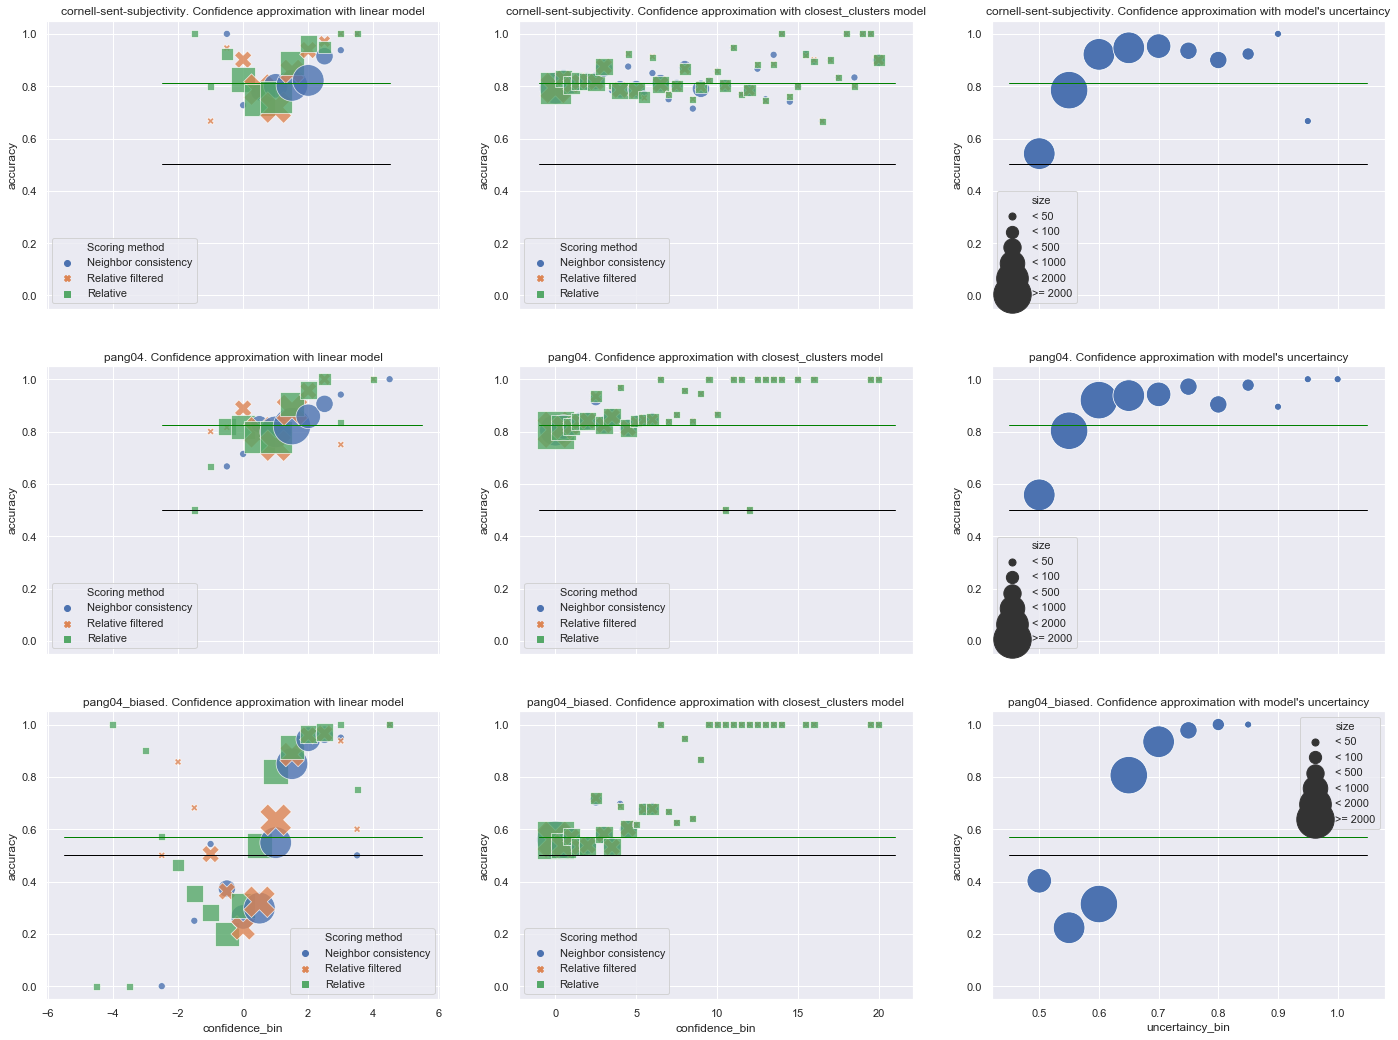

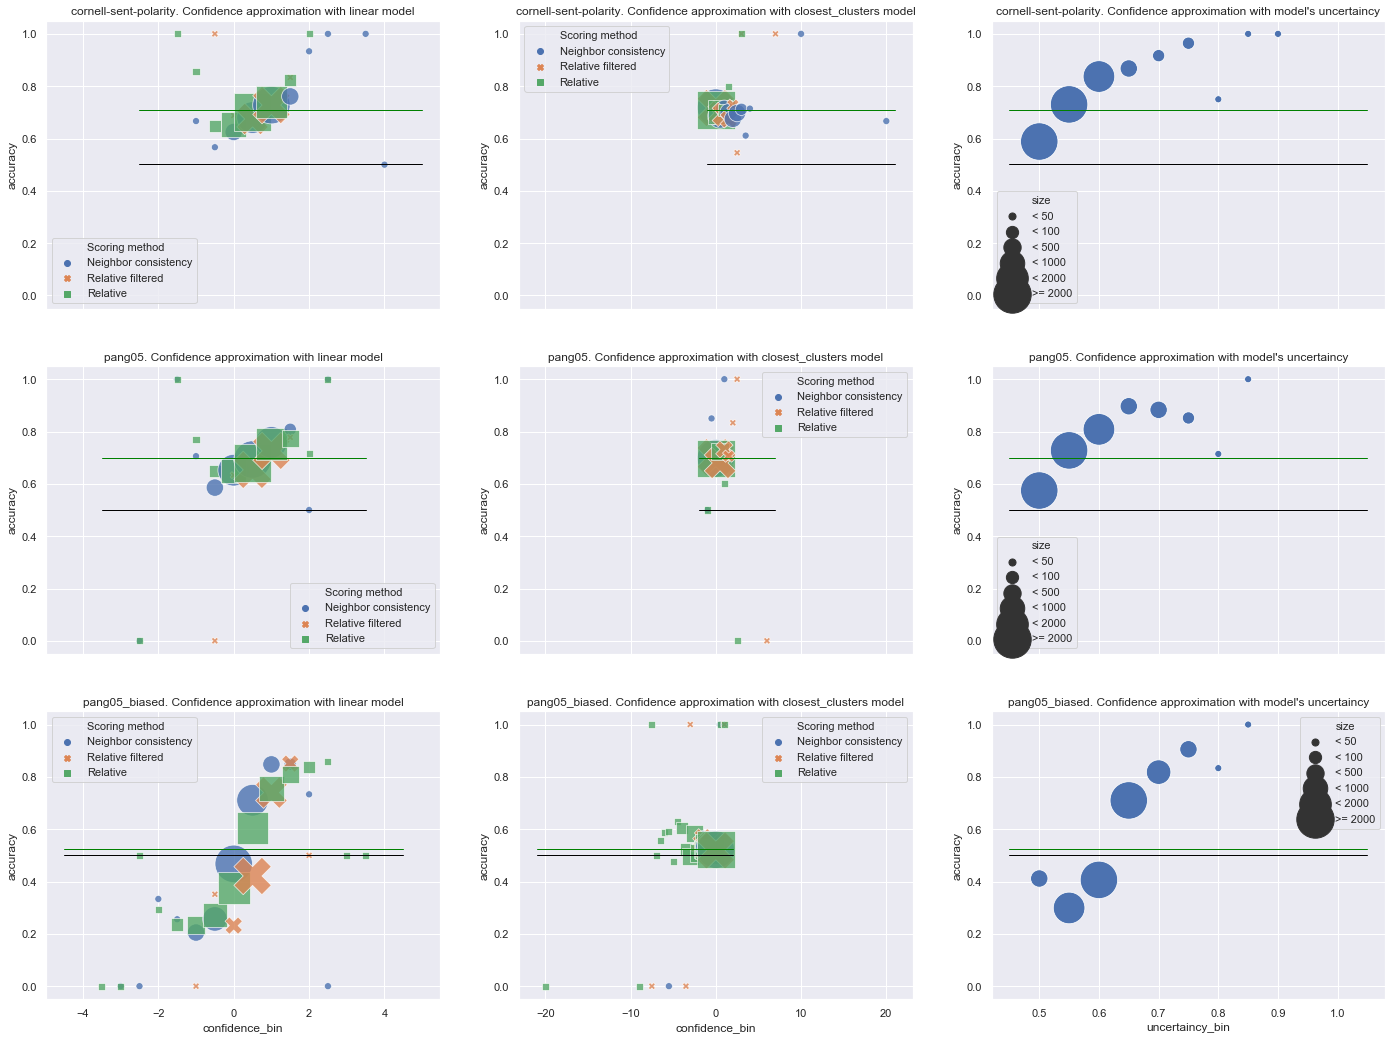

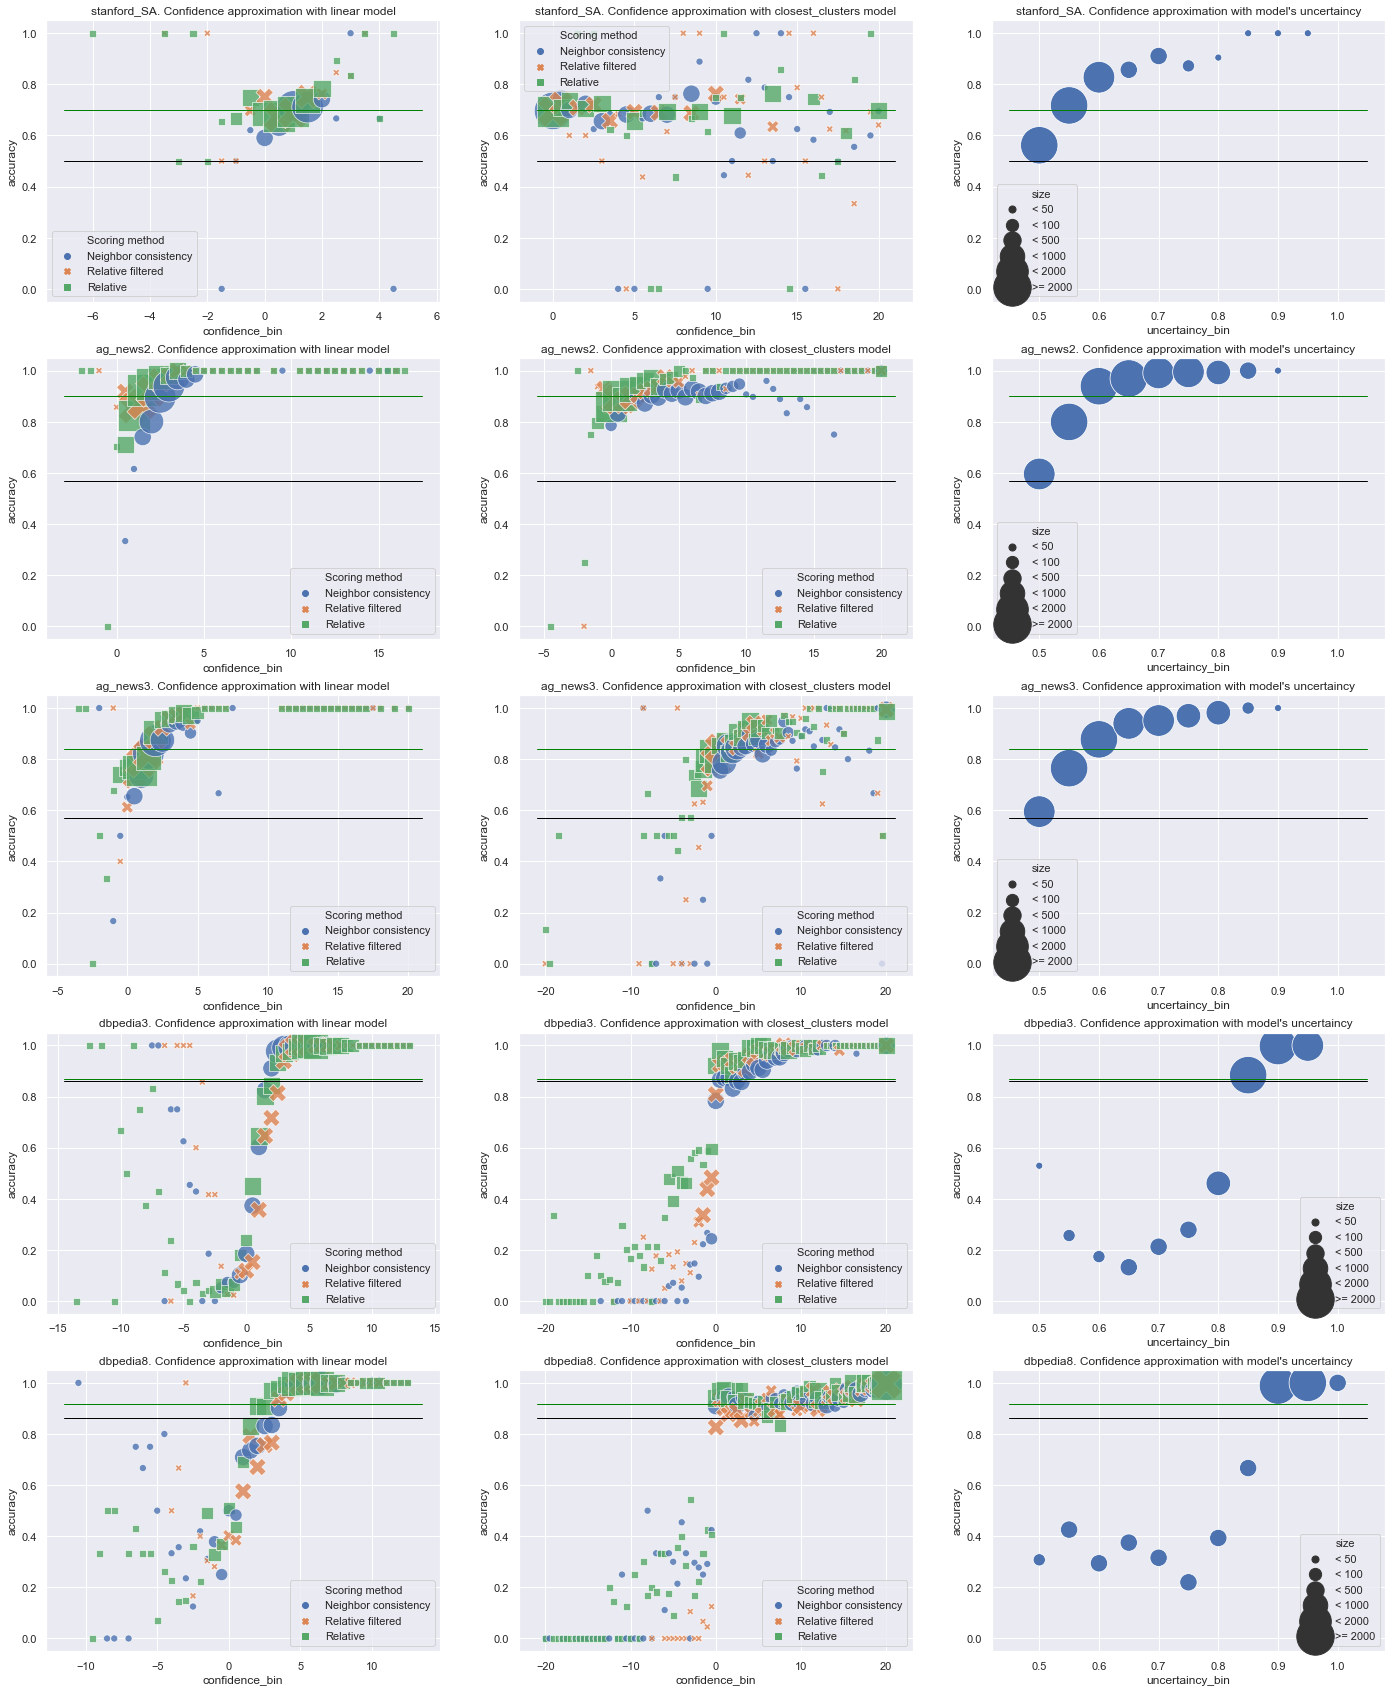

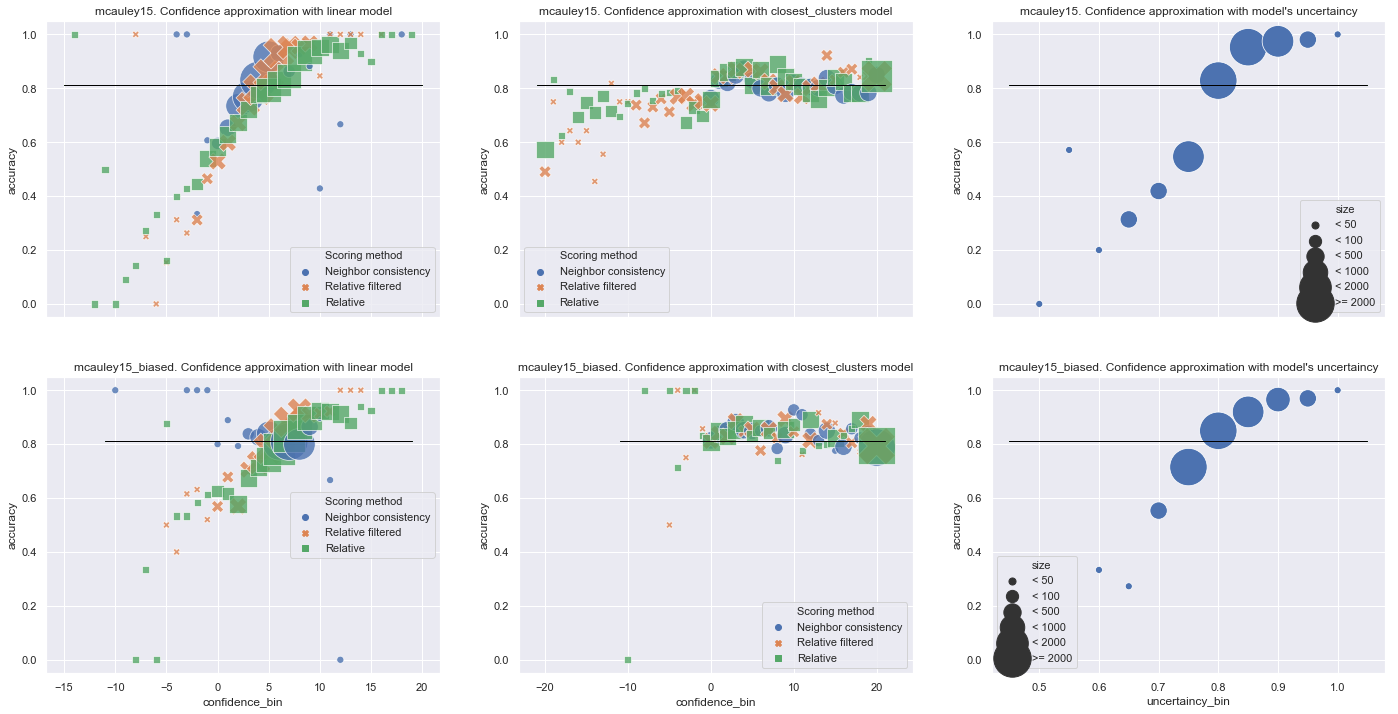

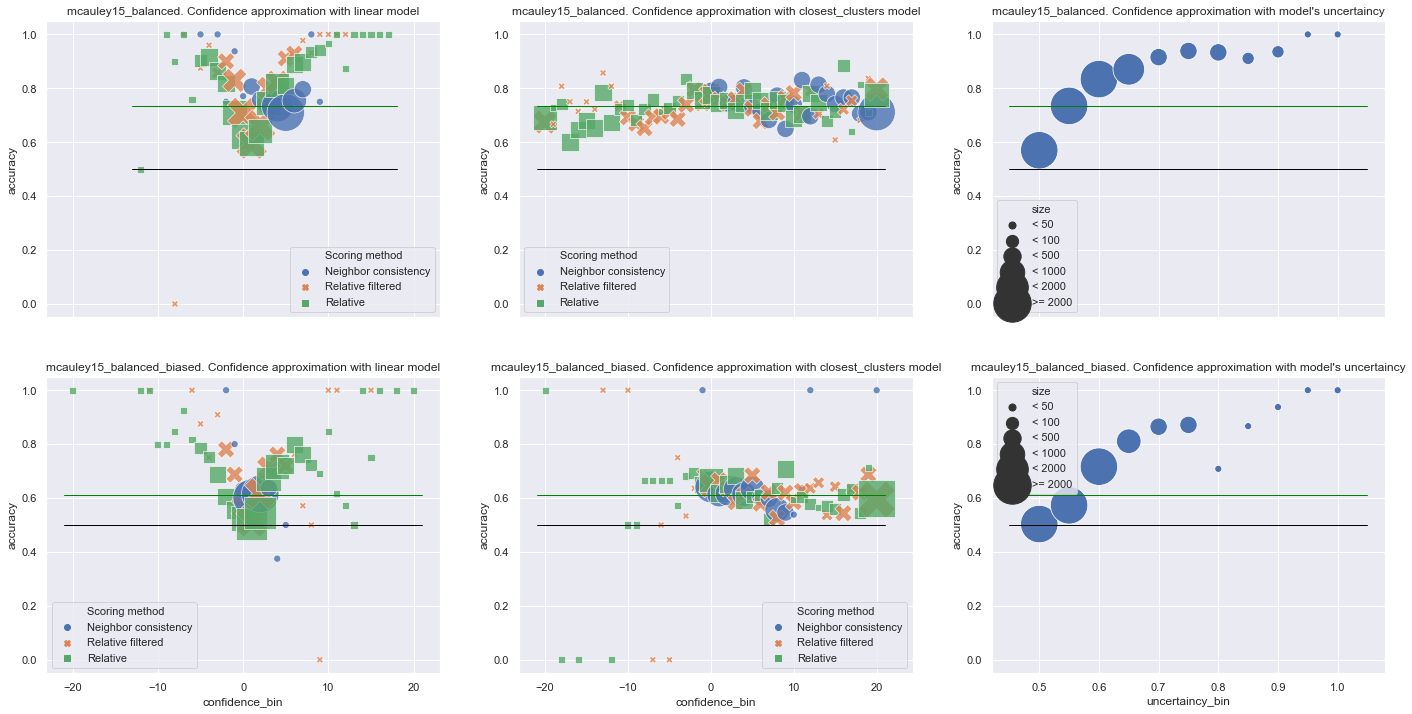

In [78]:

all_datasets = ['cornell-sent-subjectivity', 'pang04', 'pang04_biased', 'cornell-sent-polarity',
                'pang05', 'pang05_biased', 'stanford_SA', 'ag_news2', 'ag_news3','dbpedia3', 'dbpedia8',
               'mcauley15', 'mcauley15_biased', 'mcauley15_balanced', 'mcauley15_balanced_biased']
viz(all_datasets[:3], saveas='pang04')
viz(all_datasets[3:6], saveas='pang05')
viz(all_datasets[6:11], 'none', saveas='others')
viz(all_datasets[11:13], saveas='mcauley15')
viz(all_datasets[13:15], saveas='mcauley15_balanced')

In [47]:
name = 'pang04'
PRECISION = 1 if name.startswith('mcauley') else 2
p = 'C:\\Users\\User\\PycharmProjects\\textual-membership-queries-master\\lib\\confidence\\'+name+'_test_confidence.csv'
df = pd.read_csv(p)
c_bin = [max(-20,min(round(x*PRECISION)/PRECISION, 20)) for x in df['confidence']]
df['confidence_bin'] = c_bin
data = df.groupby(['confidence_bin', 'cluster_scoring', 'confidence_model']).mean()['accuracy'].reset_index()
data['size'] = df.groupby(['confidence_bin', 'cluster_scoring', 'confidence_model']).count()['accuracy'].values
data['size'] = data['size'].map(lambda x: size_grouping(x))


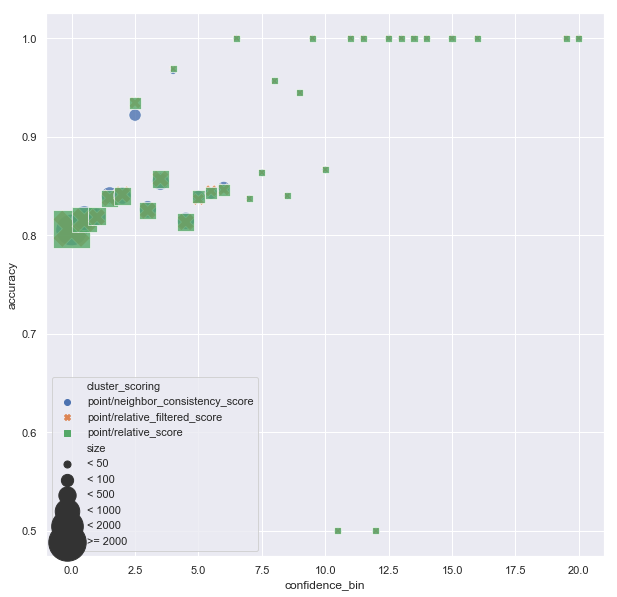

In [61]:
plt.figure(figsize=(10,10))
sns_plot = sns.scatterplot(x='confidence_bin', y='accuracy', data=data[data.confidence_model == 'closest_clusters'], 
                                        style='cluster_scoring', style_order=sorted(df.cluster_scoring.unique()), 
                           hue='cluster_scoring', hue_order=sorted(df.cluster_scoring.unique()), alpha=0.8,
                                       size='size',sizes=string_to_size,size_order=string_to_size.keys())